 # Project 3 #

## Installing and Loading Libraries ##

In [81]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install tensorflow


In [226]:
import seaborn as sns
import pandas as pd
import numpy as np
import math as m
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [150]:
train = pd.read_csv("/Users/nafinvwich/Downloads/spring2025/dataMining/project3/house-prices-advanced-regression-techniques/train.csv")
train.head()

testS = pd.read_csv("/Users/nafinvwich/Downloads/spring2025/dataMining/project3/house-prices-advanced-regression-techniques/test.csv")
testS.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Pre-Processing ##

### Training Data Set ###

In [111]:
## Dropped ID because IDEK what that would be useful for, just unnecessary data. 

df = train.drop('Id', axis=1)
df.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [115]:
df


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [119]:
train.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
train_nulls = df.isna().sum()[df.isna().sum() > 1]
train_nulls
## Dropped Null!

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [133]:
y=df['SalePrice']
data=df.drop('SalePrice', axis=1)

In [ ]:
numCols = df.select_dtypes(include=['number']).columns
df=df[numCols]
means=df.mean()
df.fillna(means, inplace=True)


### Test Data Set ###

In [151]:
testS.drop('Id', axis=1, inplace=True)
testS.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [152]:
testS.head()
print(testS.describe(include=[np.number]))


        MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000  ...   
mean   1971.357779   1983.662783   100.709141   439.203704    52.619342  ...   
std      30.390071     21.130467   177.625900   455.268042   176.753926  ...   
min 

In [157]:
print(testS.isnull().sum())


MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64


In [164]:
print(testS.columns)  
print(numCols)       

numCols = [col for col in numCols if col in testS.columns]

testS = testS[numCols]
testS.fillna(means, inplace=True)  


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclose

## Modeling ##

### Experiment 1 ###

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [284]:
X = df.drop(columns = 'SalePrice',axis=1)
Y = df.SalePrice

In [285]:
linearModel1 = LinearRegression().fit(X,Y)

In [286]:
scores = []

for _ in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    linearModel1.fit(X_train, Y_train)
    
    r2_score = linearModel1.score(X_test, Y_test)
    scores.append(r2_score)

average_r2 = sum(scores) / len(scores)
print('Coefficient of Determination:', average_r2)

Coefficient of Determination: 0.757323850136561


Coefficient of Determination or R^2 means that the linear regression model explains 75.57% of the variange in the target model. Anything above .7 is considered a good fit. 

In [212]:
import statsmodels.api as sm

X_train_with_constant = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_train_with_constant)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     136.7
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:55:42   Log-Likelihood:                -13915.
No. Observations:                1168   AIC:                         2.790e+04
Df Residuals:                    1133   BIC:                         2.808e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.268e+04   1.67e+06     -0.050

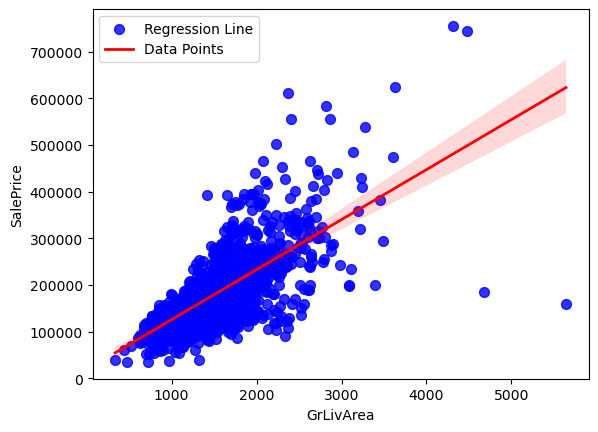

In [222]:
plot_rnet = sns.regplot(
    data=df, 
    x='GrLivArea', 
    y='SalePrice', 
    scatter_kws={'color': 'blue', 's': 50},  
    line_kws={'color': 'red', 'linewidth': 2}  
)

plt.legend(['Regression Line', 'Data Points'])

plt.show()



In [288]:
predictions = linearModel1.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mean_squared_error(Y_test, predictions, squared=False)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 1411910565.26
Mean Absolute Error (MAE): 22085.49
Root Mean Squared Error (RMSE): 37575.40


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Experiment 2 ###

In [289]:
X2 = df.drop(columns=['SalePrice'])
Y2 = df['SalePrice']


In [290]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, Y_train)

print("Best alpha:", ridge_cv.alpha_)


Best alpha: 100.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

ridge_model = Ridge(alpha=100.0)

r2_scores = []
for _ in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X2_scaled, Y2, test_size=0.2)
    ridge_model.fit(X_train, Y_train)
    y_pred = ridge_model.predict(X_test)
    r2_scores.append(r2_score(Y_test, y_pred))

print('Average Coefficient of Determination (R²):', np.mean(r2_scores))


Average Coefficient of Determination (R²): 0.7680490944204698


In [269]:

ridge_model = Ridge(alpha=100.0)  
ridge_model.fit(X_train, Y_train)


predictions = ridge_model.predict(X_test)


mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
rmse = mean_squared_error(Y_test, predictions, squared=False)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 991757961.14
Mean Absolute Error (MAE): 21186.10
Root Mean Squared Error (RMSE): 31492.19


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Experiment 3 ###

In [291]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

scores = []

for _ in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    random_forest_model.fit(X_train, Y_train)
    
    r2_score = random_forest_model.score(X_test, Y_test)
    
    scores.append(r2_score)

average_r2 = sum(scores) / len(scores)
print('Average Coefficient of Determination (R²):', average_r2)


Average Coefficient of Determination (R²): 0.886492920059738


In [277]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error

X = df.drop(columns=['SalePrice'])  # Features (excluding target column)
Y = df['SalePrice']  # Target column (SalePrice)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [278]:
y_pred = rf_model.predict(X_test)


In [281]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 870636329.97
Mean Absolute Error (MAE): 18107.83
Root Mean Squared Error (RMSE): 29506.55


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
